# Introduction to Convolutional Neural Networks (CNN)
**Notebook 1 of 2**

In our previous tutorials, we explored the fundamentals of deep neural networks (DNN).  We delved into the inner workings of how DNNs learn with the data.  This tutorial gives a cursory overview of how convolutional neural networks (CNN) work and why they are used in image and video inferencing. A more programmatic approach to CNNs is covered in the CNN for Image Inferencing tutorial [CNN in image Inferencing](https://github.com/uOttawa-IT-Research-teaching/CNN-ImageInferencing)

## Learning Objectives

Average time to complete: 15min

By the end of this tutorial you should be able to:
* Understand the underlying concept of CNN models using the notions taught in the DNN / CNN intro workshop

## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* Tensorflow
* We will use scikit learn as our machine learning package.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it. 

We also need to respect a few research data management best practices along the way, these best practices are recommended by the [Digital Research Alliance of Canada](https://zenodo.org/records/4000989).

SAVE YOUR RAW DATA IN ORIGINAL FORMAT
* Don't overwrite your original data with a cleaned version.
* Protect your original data by locking them or making them read-only.
* Refer to this original data if things go wrong (as they often do).

BACKUP YOUR DATA
* Use the 3-2-1 rule: Save three copies of your data, on two different storage mediums, and one copy off site. The off site storage can be OneDrive or Google drive or whatever your institution provides.
* We are using Open Data, so it does not contain any personally identifiable data or data that needs to be restricted or protected in any way. However, if your data contains confidential information, it is important to take steps to restrict access and encrypt your data.

There are a few more RDM best practices that will help you in your project management, and we will highlight them at the beginning of each tutorial. 

There are just a few libraries to load

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Video

### What if we want to train an image classifier i.e. use an image as an input ?
Let's start with some image basics:

- An image is a **collection of pixels**.  For example, a 32x32 image has 1024 pixels.
- Each pixel is an **intensity represented by a number** in a range [0, 255]. 0 is black and 1 is white.​
- Colour images have 3 dimensions: **[width, height, depth]** where depth is usually 3.  Depth encodes the intensity of RGB values [Red, Green, Blue].<br>
![](./pynb_pics/imageof8.jpg)
<p style="text-align: center;">An image is just a matrix of integers</p>

There are 2 major limitations to feeding this matrix into a DNN as seen earlier
- Does not scale well to bigger images:​

  - Most real-life images as far bigger than 1024 pixels.  For example, a colour image of 320x320x3 has a dimension of 307200.​

- Does not consider the property of an image:​

  - Locality: Nearby pixels are usually strongly correlated (See outline of '8' picture). Scaling breaks the pattern.​

  - Translation invariance: Meaningful features can occur anywhere in image.​
![](./pynb_pics/goose.jpg)

Comment: here in the browser the image is not visible. Not sure if becuase it needs to be open in ganymede.uottawa.ca. If there is a glitch needs to be addressed.

How **convolution** deals with these limitations:

 - **Weight Sharing**: All local parts of an image are processed with the same weights so that identical patterns can be detected at many location e.g. horizontal edges, curves, etc.

 - **Hierarchy of features**: Lower-level patterns learned at the start are composed to form higher-level ones across layers e.g. edges to contours to head outlines, etc.

How does convolution work?

 - Define a filter: a 2D weight matrix of a certain size e.g. 3x3 filter

 - Convolve the whole image with the filter: multiply each pixel under the filter with the weight

 - Convolution output forms a new image: a feature map

 - Using multiple filters (each with a different weight matrix), different features can be captured.

### Convolution example: mean filter

Take an image with pixel values as follows​

Comment: Describe the features of the image above as well.

In [3]:

fig,ax=plt.subplots(1,subplot_kw={'aspect':'equal'})

# A small 3x3 sample array
# Normalise the data to between 0 and 1

imarray=np.array([[0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 0., 0.],
 [0., 0., 1., 1., 1., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0.]])

# plot the array
ax.imshow(imarray,cmap='gray', interpolation='none')

plt.show()

NameError: name 'plt' is not defined

Recall that a mean filter is a 2D matrix – 1 iteration​

Comment: what does the sentence above mean? explain it plz.

In [3]:
[[.11, .11, .11],
[.11, .11, .11],
[.11, .11, .11]]

[[0.11, 0.11, 0.11], [0.11, 0.11, 0.11], [0.11, 0.11, 0.11]]

In a convolution, this "mean filter" slides across the image, takes values of 9 connected pixels, multiplies with the weights and returns sum i.e. the result is a weighted average (mean) of the 9 values hence "mean filter"

Comment: the value is always 9 or in this case? please explain.

### Convolution layer in action

In [4]:
Video.from_file("./pynb_pics/meanfilter.mp4", width=320, height=320)

Video(value=b'\x00\x00\x00\x18ftypmp42\x00\x00\x00\x00mp41isom\x00\x00\x00(uuid\\\xa7\x08\xfb2\x8eB\x05...', h…

### Feature extraction
Below is an example of the the averaging effect in an area of the image.  Notice how it blurs out any edges in the image.  This represents the initial stages of feature detections in the training image that the model will use to identify objects.

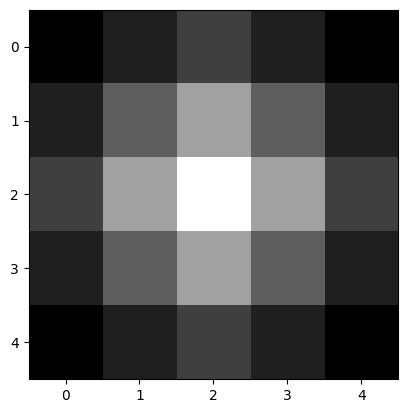

In [5]:
fig,ax=plt.subplots(1,subplot_kw={'aspect':'equal'})

# After applying filter - one iteration
imarray=np.array([[0.11, 0.22, 0.33, 0.22, 0.11],
 [0.22, 0.44, 0.67, 0.44, 0.22],
 [0.33, 0.67, 1.,   0.67, 0.33],
 [0.22, 0.44, 0.67, 0.44, 0.22],
 [0.11, 0.22, 0.33, 0.22, 0.11]])

# plot the array
ax.imshow(imarray,cmap='gray', interpolation='none')

plt.show()


### Learning features

Comment: try to explian this heading a form of paragraphand then include the point below.

- Usually there are many filters for each layer
- Each filter captures a different pattern of the same image
- Multiple layers allow features at different scales to be captured.  This is the hierarchy of features referred to earlier.
- Early filters capture edges and textures
- Later filters form parts and objects
![](./pynb_pics/layers.jpg)

### Putting DNNs and CNNs together

Comment: what is the purpose of putting DNN and CNN together? explain here.

#### DNN uses many fully-connected layers
Comment: explain the heading above.

#### CNN contains mostly convolutional layers
Comment: explain the heading above
- Convolutional layer: Image undergoes a convolution with filters
- RELU layer: Activation function to introduce non-linearity in order to reduce error as much as possible (same function as with DNN)
- Pooling layer: Image undergoes a convolution with a mean (or max) filter. Down-sampling and feature preservation.  Saves time and computations.
- Fully-connected layer: Last layer to output a class probability prediction.  That's what you see.